# Time Series Analysis

import libraries

In [66]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA


Load the Data

In [67]:
aqi=pd.read_csv("C:\mypythonfiles\AQI_Airpollution (1).csv")
aqi.head()

,Date,Country,Status,AQI Value
0,21-07-2022,Albania,Good,14
1,21-07-2022,Algeria,Moderate,65
2,21-07-2022,Andorra,Moderate,55
3,21-07-2022,Angola,Unhealthy for Sensitive Groups,113
4,21-07-2022,Argentina,Moderate,63


In [68]:
aqi.isnull().sum()

Date         0
Country      0
Status       0
AQI Value    0
dtype: int64

In [69]:
aqi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18227 entries, 0 to 18226
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Date       18227 non-null  object
 1   Country    18227 non-null  object
 2   Status     18227 non-null  object
 3   AQI Value  18227 non-null  int64 
dtypes: int64(1), object(3)
memory usage: 569.7+ KB


In [70]:
print(aqi[aqi['Date'].isna()])

Empty DataFrame
Columns: [Date, Country, Status, AQI Value]
Index: []


In [71]:
aqi['Date'] = pd.to_datetime(aqi['Date'],errors = 'coerce')
aqi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18227 entries, 0 to 18226
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       18227 non-null  datetime64[ns]
 1   Country    18227 non-null  object        
 2   Status     18227 non-null  object        
 3   AQI Value  18227 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 569.7+ KB


C:\Users\DELL\AppData\Local\Temp\ipykernel_8644\3707336382.py:1: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  aqi['Date'] = pd.to_datetime(aqi['Date'],errors = 'coerce')


In [72]:
aqi.set_index("Date",inplace=True)
aqi.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 18227 entries, 2022-07-21 to 2025-03-13
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Country    18227 non-null  object
 1   Status     18227 non-null  object
 2   AQI Value  18227 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 569.6+ KB


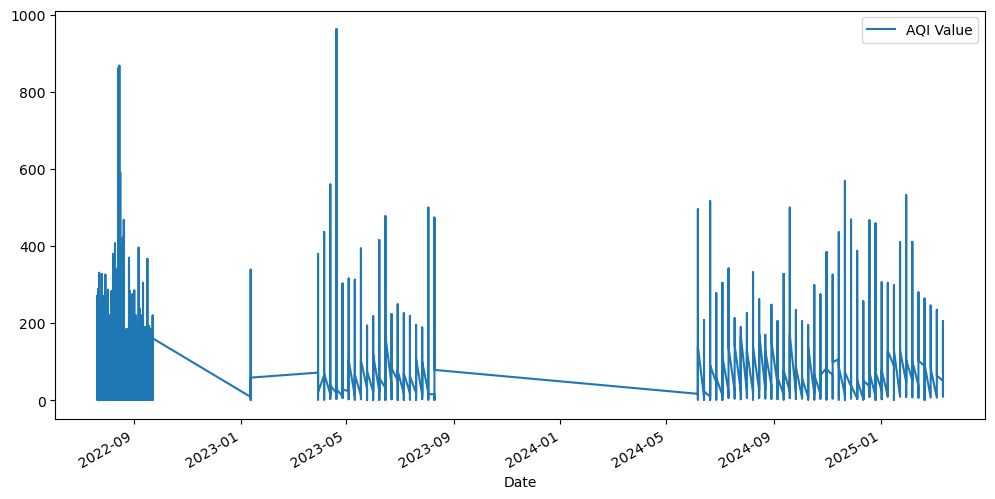

In [73]:
aqi.plot(figsize=(12,6),subplots=True)
plt.show()

The graph represents the AQI(Air quality index) values from mid of 2022 to 2025.
There are gaps in data where values drop to zero.
High AQI values are seen in mid-2022, early 2023, and mid-2024 with worsening air quality.
These spikes suggest poor air quality may be due to industrial activities.

In [74]:
adfuller_result=adfuller(aqi['AQI Value'])

In [75]:
print(adfuller_result)

(-15.215400453061477, 5.579625689083851e-28, 45, 18181, {'1%': -3.4307097284809336, '5%': -2.86169898646948, '10%': -2.566854624305701}, 193290.32233171744)


In [76]:
if adfuller_result[1]<0.05:
    print("Stationary")
else:
    print("Non Stationary")

Stationary


In [77]:
decomp=seasonal_decompose(aqi['AQI Value'],model='additive',period=365)

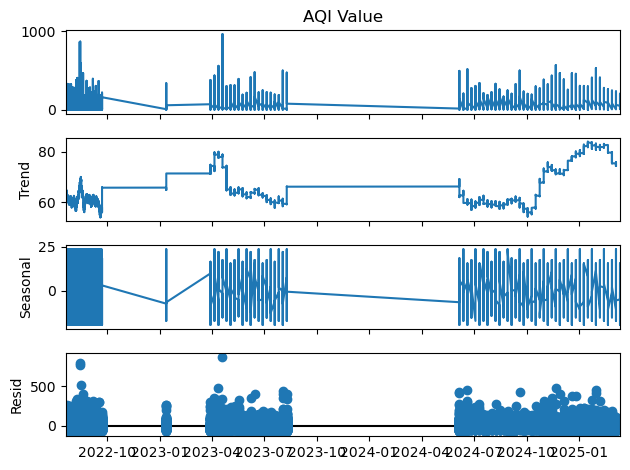

In [78]:
decomp.plot()
plt.show()

In [79]:
len(aqi)

18227

In [80]:
print(len(aqi)*0.8)

14581.6


In [81]:
train = aqi.iloc[0:14581]
test= aqi.iloc[14581:]

In [82]:
mymodel=ARIMA(train['AQI Value'],order=(1,1,1))

C:\Users\DELL\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\DELL\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\DELL\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [83]:
mymodel=mymodel.fit()

In [91]:
test['forecast'] = forecast
test.head()

C:\Users\DELL\AppData\Local\Temp\ipykernel_8644\2382496083.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['forecast'] = forecast


,Country,Status,AQI Value,forecast
Date,,,,
2024-08-22,Croatia,Moderate,53,NaN
2024-08-22,Cyprus,Moderate,55,NaN
2024-08-22,Czech Republic,Good,49,NaN
2024-08-22,Denmark,Good,14,NaN
2024-08-22,Dominican Republic,Good,23,NaN


In [92]:
forecast=mymodel.forecast(steps=len(test))
print(forecast)

14581    59.775437
14582    60.125750
14583    60.134658
14584    60.134885
14585    60.134891
           ...    
18222    60.134891
18223    60.134891
18224    60.134891
18225    60.134891
18226    60.134891
Name: predicted_mean, Length: 3646, dtype: float64


C:\Users\DELL\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\DELL\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [93]:
test.head()

,Country,Status,AQI Value,forecast
Date,,,,
2024-08-22,Croatia,Moderate,53,NaN
2024-08-22,Cyprus,Moderate,55,NaN
2024-08-22,Czech Republic,Good,49,NaN
2024-08-22,Denmark,Good,14,NaN
2024-08-22,Dominican Republic,Good,23,NaN


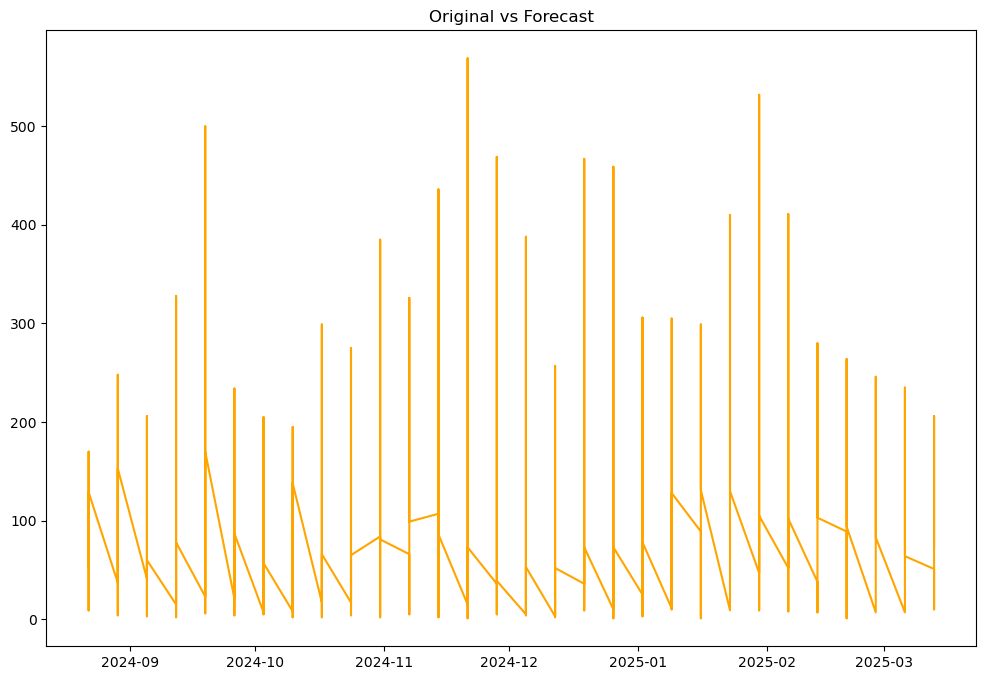

In [94]:
plt.figure(figsize=(12,8))
plt.plot(test.index,test['AQI Value'],color='orange',label="Original")
plt.plot(test.index,test['forecast'],color='green',label="Forecast")
plt.title("Original vs Forecast")
plt.show()